# **H20 AutoML Paris Housing Regression**

## **Abstract**

An abstract is:

What is the question?

What did you do?

What were the results?

The goal was to construct a realistic model to precisely predict the price of houses in Paris. It is generally believed that it’s impossible to precisely predict the price of house as it depends on various factors. For this dataset price is the dependent variable and others are independent variables. First, major factors affecting the housing prices should be selected. Then, a model for housing price prediction should be established from linear regression. That should be applied to the Paris housing dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

##**Dataset**

**Metadata**

**squareMeters:** Area if the apartment in square meters

**numberOfRooms:** Number of rooms in the apartment

**floors:** The amount of floors in the house

**cityCode:** Code of the city, where the apartment situated

**cityPartRange:** Prestige of the area in range from 0 to 10 

**numPrevOwners:** Number of previous owners

**made:** The year when house was built

**isNewBuilt:** The apartment is new or reinovated 

**hasStormProtector:** Apartment has storm protector or not

**basement:** The apartment has basement or not 

**attic:** The apartment has attic or not 

**garage:** The apartment has garage or not 

**hasStorageRoom:** The apartment has storage anot

**hasGuestRoom:** The apartment has guest room or not

**price:** The price of the apartment 

**category:** Category of the house

**PoolAndYard:** The apartment has pool and yard or not 

# **Importing required Libraries and H20 Initialization**

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6 
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:32605..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv9amcosz
  JVM stdout: /tmp/tmpv9amcosz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv9amcosz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:32605
Connecting to H2O server at http://127.0.0.1:32605 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ww6rh3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9h9rq_i4
  JVM stdout: /tmp/tmp9h9rq_i4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9h9rq_i4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_r9ndv0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Importing DataSet

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [ ]:
# Import the processed data 
url = "/content/ParisHousing.csv"
df = h2o.import_file(path = url)

H2OResponseError: ignored

# **Studying Data**

In [ ]:
df.describe()

Rows:10000
Cols:18

,C1,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
type,int,int,enum,int,int,int,int,int,enum,enum,int,int,int,enum,int,real,enum,enum
mins,0.0,89.0,,1.0,3.0,1.0,1.0,1990.0,,,0.0,1.0,100.0,,0.0,10313.5,,
mean,4999.5,49870.1312,,50.2763,50225.48609999999,5.510099999999999,5.5216999999999965,2005.4885,,,5033.103900000001,5028.010600000003,553.1212,,4.994600000000001,4993447.525750002,,
maxs,9999.0,99999.0,,100.0,99953.0,10.0,10.0,2021.0,,,10000.0,10000.0,1000.0,,10.0,10006771.2,,
sigma,2886.8956799071675,28774.375350295035,,28.88917127111252,29006.67579929317,2.8720241716051462,2.8566667927002705,9.30808958934003,,,2876.729544811641,2894.3322098165786,262.0501698906413,,3.176409891367894,2877424.1099450146,,
zeros,1,0,,0,0,0,0,0,,,1,0,0,,914,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,75523.0,three,63.0,9373.0,3.0,8.0,2005.0,False,True,4313.0,9005.0,956.0,False,7.0,7559081.5,Basic,has pool and no yard
1,1.0,80771.0,thirty-nine,98.0,39381.0,8.0,6.0,2015.0,True,False,3653.0,2436.0,128.0,True,2.0,8085989.5,Luxury,has pool and has yard
2,2.0,55712.0,fifty-eight,19.0,34457.0,6.0,8.0,2021.0,False,False,2937.0,8852.0,135.0,True,9.0,5574642.1,Basic,has pool and no yard


The above numbers makes sense, but there are still some variables are still in categorical form. Such as the numverOfRooms, isNewBuilt and hasStormProtector.

In [ ]:
df.types

{'C1': 'int',
 'squareMeters': 'int',
 'numberOfRooms': 'enum',
 'floors': 'int',
 'cityCode': 'int',
 'cityPartRange': 'int',
 'numPrevOwners': 'int',
 'made': 'int',
 'isNewBuilt': 'enum',
 'hasStormProtector': 'enum',
 'basement': 'int',
 'attic': 'int',
 'garage': 'int',
 'hasStorageRoom': 'enum',
 'hasGuestRoom': 'int',
 'price': 'real',
 'category': 'enum',
 'PoolAndYard': 'enum'}

In [ ]:
df.shape

(10000, 18)

Label Encoding

In [ ]:
import h2o

# Start an H2O cluster
h2o.init()

# Specify the columns to be encoded
cols_to_encode = ["numberOfRooms", "isNewBuilt", "hasStormProtector", "hasStorageRoom","category","PoolAndYard"]

# Perform label encoding
for col in cols_to_encode:
    df[col] = df[col].asfactor().asnumeric()

# View the encoded dataset
print(df.head())


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 31 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_uzxb77
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


  C1    squareMeters    numberOfRooms    floors    cityCode    cityPartRange    numPrevOwners    made    isNewBuilt    hasStormProtector    basement    attic    garage    hasStorageRoom    hasGuestRoom        price    category    PoolAndYard
   0           75523               87        63        9373                3                8    2005             0                    1        4313     9005       956                 0               7  7.55908e+06           0              1
   1           80771               81        98       39381                8                6    2015             1                    0        3653     2436       128                 1               2  8.08599e+06           1              0
   2           55712               15        19       34457                6                8    2021             0                    0        2937     8852       135                 1               9  5.57464e+06           0              1
   3           32316            

In [ ]:
h2o.export_file(df, "/content/ParisHousing.csv", force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df

C1,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,87,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7.55908e+06,0,1
1,80771,81,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8.08599e+06,1,0
2,55712,15,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5.57464e+06,0,1
3,32316,31,6,27939,10,4,2012,0,1,659,7141,359,0,3,3.23256e+06,0,3
4,70429,38,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7.05505e+06,1,0
5,39223,84,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3.92665e+06,0,1
6,58682,75,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5.87638e+06,1,0
7,86929,50,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8.69687e+06,0,2
8,51522,87,61,9047,8,3,2012,1,1,632,5792,807,1,5,5.15406e+06,0,3
9,39686,34,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3.97089e+06,0,3


After label encoding, the categorical variables are modified to numerical numbers. So the machine can read. 

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(8007, 18)
(1993, 18)


In [ ]:
#Display all columns in X
X=df.columns
print(X)

['C1', 'squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price', 'category', 'PoolAndYard']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='price'
X.remove(y_numeric) 
print(X)

['C1', 'squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'category', 'PoolAndYard']


In [ ]:
dfpd=pd.read_csv("/content/ParisHousing.csv")

# **H20 AutoML Execution**

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


**Interpreting the above results**

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [ ]:
print(aml.leaderboard)

model_id                                                    rmse          mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_3_AutoML_1_20230226_72455   52051.7  2.70938e+09  39950.2  nan                      2.70938e+09
StackedEnsemble_AllModels_2_AutoML_1_20230226_72455      52065.3  2.7108e+09   39963.9  nan                      2.7108e+09
StackedEnsemble_AllModels_1_AutoML_1_20230226_72455      55693    3.10171e+09  42524.3  nan                      3.10171e+09
StackedEnsemble_BestOfFamily_2_AutoML_1_20230226_72455   60987.4  3.71947e+09  46556.4  nan                      3.71947e+09
StackedEnsemble_BestOfFamily_1_AutoML_1_20230226_72455   61799.7  3.8192e+09   47175    nan                      3.8192e+09
GBM_1_AutoML_1_20230226_72455                            62577.2  3.9159e+09   47708.5  nan                      3.9159e+09
DeepLearning_1_AutoML_1_20230226_72455                   69823    4.87525e+09  56762.6  nan                      4.87525e+09
XGB

# **Analysing relation between all variables**

When all independent variables were plotted against 'price' variable it is observed that for 'squareMeters' roughly a linear line is obtained. So it can be concluded from this plot that the squareMeters have linear relation with Price.

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard', 'squareMeters','category']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif
     

,variables,VIF
0,isNewBuilt,2.491364
1,numberOfRooms,3.920598
2,floors,4.032238
3,cityCode,4.000836
4,cityPartRange,4.687066
5,numPrevOwners,4.747301
6,made,39.175801
7,hasStormProtector,2.000541
8,basement,4.064845
9,attic,4.022888


VIF for 'Made' is greater than 10. There are no any other variables that is over 10. Hence in this stage we are not dropping anything variables. 

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('price ~ isNewBuilt + numberOfRooms + floors + cityCode + cityPartRange + numPrevOwners + made + hasStormProtector + basement + attic + garage + hasStorageRoom + hasGuestRoom + PoolAndYard+ squareMeters + category', data=dfpd).fit()
results.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.279e+09
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:29:44   Log-Likelihood:                -90245.
No. Observations:               10000   AIC:                         1.805e+05
Df Residuals:                    9983   BIC:                         1.806e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           1.06e+04   4335.293      2.445      0.015    2101.596    1.91e+04
isNewBuilt           12.6780     44.932      0.282      0.778     -75.398     100.754
numberOfRooms        -0.2453      0.694     -0.354      0.724      -1.605       1.114
floors               54.5885      0.696     78.382      0.000      53.223      55.954
cityCode             -0.0007      0.001     -1.070      0.285      -0.002       0.001
cityPartRange        47.4122      7.007      6.766      0.000      33.677      61.147
numPrevOwners         1.6128      7.048      0.229      0.819     -12.203      15.429
made                 -2.3354      2.161     -1.081      0.280      -6.572       1.901
hasStormProtector   131.7033     40.231      3.274      0.001      52.842     210.564
basement             -0.0033      0.007     -0.467      0.641      -0.017       0.010
attic                -0.0034      0.007     -0.492      0.623      -0.017       0.010
garage                0.1002      0.077      1.303      0.192      -0.050       0.251
hasStorageRoom        6.5260     40.279      0.162      0.871     -72.428      85.480
hasGuestRoom         -6.9098      6.338     -1.090      0.276     -19.334       5.515
PoolAndYard       -1719.2318     21.406    -80.317      0.000   -1761.191   -1677.272
squareMeters        100.0000      0.001   1.43e+05      0.000      99.999     100.001
category            530.8195     78.356      6.774      0.000     377.225     684.414
==============================================================================
Omnibus:                       18.084   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.539
Skew:                           0.088   Prob(JB):                     9.43e-05
Kurtosis:                       3.117   Cond. No.                     1.65e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As seen from the OLS summary p-value for isNewBuilt, numberOfRooms, cityCode, numPrevOwners, Made, Basement, attic, garage, hasStorageRoom, and hasGuestRoom are more than 0.05. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 100%.  Now will check VIF and p-values again for the selected independent variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['floors', 'cityPartRange', 'hasStormProtector','PoolAndYard', 'squareMeters','category']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,floors,3.205750
1,cityPartRange,3.508399
2,hasStormProtector,1.872402
3,PoolAndYard,2.935844
4,squareMeters,3.229049
5,category,1.377439


VIF for all are less than 10. There is no need of dropping any other variables.

In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('price ~ floors+ cityPartRange+ hasStormProtector+ PoolAndYard+ squareMeters+ category', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.413e+09
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:28:41   Log-Likelihood:                -90248.
No. Observations:               10000   AIC:                         1.805e+05
Df Residuals:                    9993   BIC:                         1.806e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5868.9476     77.989     75.253      0.000    5716.073    6021.823
floors               54.6080      0.696     78.453      0.000      53.244      55.972
cityPartRange        47.2949      7.003      6.754      0.000      33.568      61.022
hasStormProtector   132.4816     40.217      3.294      0.001      53.648     211.315
PoolAndYard       -1717.8920     20.737    -82.843      0.000   -1758.540   -1677.244
squareMeters        100.0000      0.001   1.43e+05      0.000      99.999     100.001
category            539.4028     70.168      7.687      0.000     401.859     676.947
==============================================================================
Omnibus:                       18.247   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.719
Skew:                           0.088   Prob(JB):                     8.62e-05
Kurtosis:                       3.118   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-values for all the variables are less than 0.05 and the accuracy is 100%. It is unaffected even after removing isNewBuilt, numberOfRooms, cityCode, numPrevOwners, Made, Basement, attic, garage, hasStorageRoom, and hasGuestRoom, and this tells us that these variables were not important for calculating 'Price'.

In [ ]:
#Dopping the unecessary features as discussed above
dfpd1=dfpd.drop(['C1','isNewBuilt', 'numberOfRooms', 'cityCode', 'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'], axis=1)

In [ ]:
dfpd1

,squareMeters,floors,cityPartRange,hasStormProtector,price,category,PoolAndYard
0,75523,63,3,1,7559081.5,0,1
1,80771,98,8,0,8085989.5,1,0
2,55712,19,6,0,5574642.1,0,1
3,32316,6,10,1,3232561.2,0,3
4,70429,90,3,0,7055052.0,1,0
...,...,...,...,...,...,...,...
9995,1726,5,7,1,176425.9,0,1
9996,44403,12,9,1,4448474.0,0,0
9997,83841,69,10,1,8390030.5,0,3
9998,59036,96,1,1,5905107.0,0,3


The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [ ]:
#Calculating correlation matrix for all variables
dfpd1.corr()

,squareMeters,floors,cityPartRange,hasStormProtector,price,category,PoolAndYard
squareMeters,1.000000,0.001109,0.008758,0.007480,0.999999,-0.011800,0.007928
floors,0.001109,1.000000,-0.004921,-0.008566,0.001654,-0.003827,0.003954
cityPartRange,0.008758,-0.004921,1.000000,0.005224,0.008813,-0.003171,-0.015222
hasStormProtector,0.007480,-0.008566,0.005224,1.000000,0.007496,0.002182,0.004267
price,0.999999,0.001654,0.008813,0.007496,1.000000,-0.011399,0.007227
category,-0.011800,-0.003827,-0.003171,0.002182,-0.011399,1.000000,-0.506671
PoolAndYard,0.007928,0.003954,-0.015222,0.004267,0.007227,-0.506671,1.000000


Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

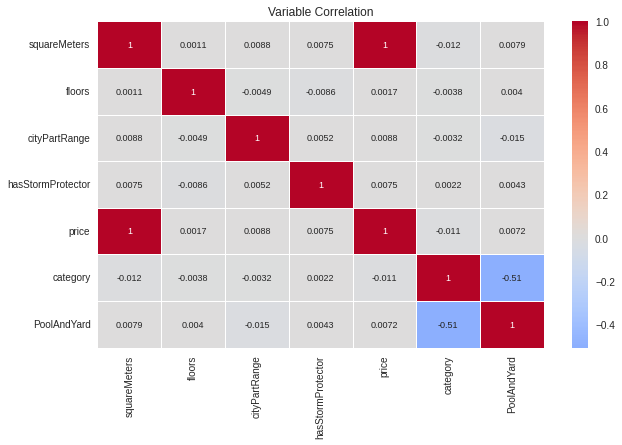

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

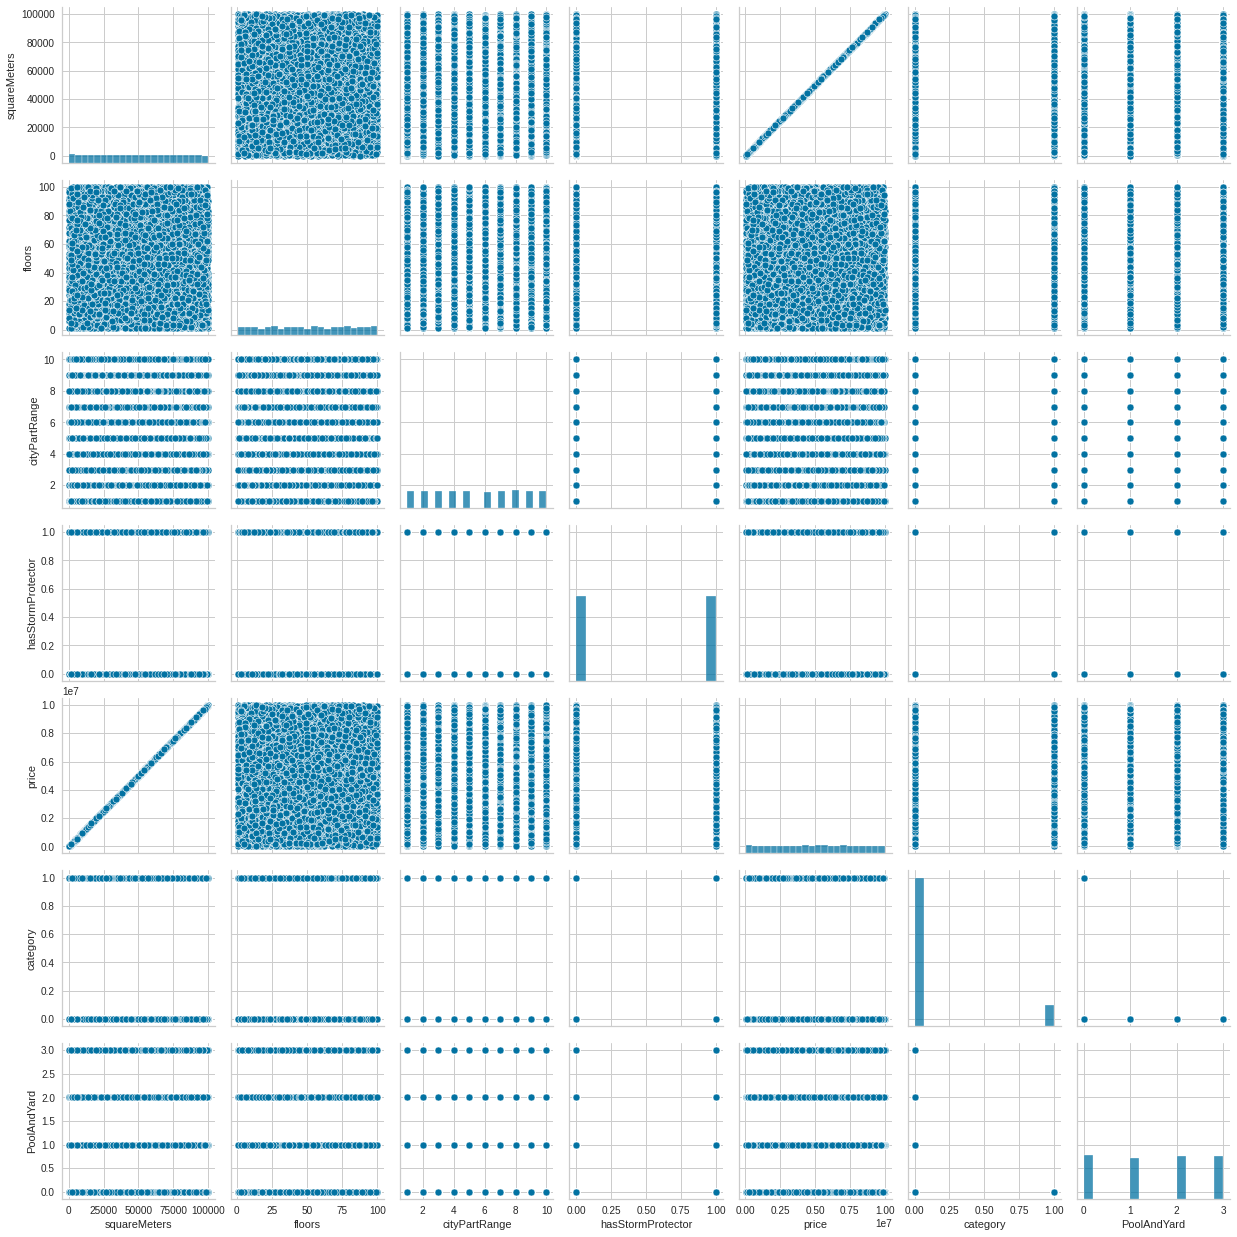

In [ ]:
sns.pairplot(dfpd1)

When all independent variables were plotted against 'price' variable it is observed that for'squareMeters' roughly a linear line is obtained. So it can be concluded from this plot that variable squareMeters have linear relation with Price

# **H20 AutoML Rexecution on new model**

Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [ ]:
df1=df.drop(['C1','isNewBuilt', 'numberOfRooms', 'cityCode', 'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'], axis=1)

In [ ]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:

X1=df1.columns
print(X1)

['squareMeters', 'floors', 'cityPartRange', 'hasStormProtector', 'price', 'category', 'PoolAndYard']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='price'
X1.remove(y1_numeric) 
print(X1)

['squareMeters', 'floors', 'cityPartRange', 'hasStormProtector', 'category', 'PoolAndYard']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/12
# GBM base models (used / total),1/5
# XGBoost base models (used / total),2/3
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml1.leaderboard)

model_id                                                   rmse          mse      mae        rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_2_20230226_74448     22342.6  4.99192e+08  16931.8    0.0547355               4.99192e+08
StackedEnsemble_BestOfFamily_3_AutoML_2_20230226_74448  22344.5  4.99277e+08  16933.5    0.0548362               4.99277e+08
XGBoost_3_AutoML_2_20230226_74448                       25191    6.34585e+08  19025.5  nan                       6.34585e+08
DeepLearning_1_AutoML_2_20230226_74448                  36342.2  1.32075e+09  29209.4    0.107899                1.32075e+09
StackedEnsemble_BestOfFamily_2_AutoML_2_20230226_74448  39820.9  1.58571e+09  30682.8    0.114682                1.58571e+09
StackedEnsemble_AllModels_1_AutoML_2_20230226_74448     39860.4  1.58885e+09  30743.1    0.114832                1.58885e+09
StackedEnsemble_BestOfFamily_1_AutoML_2_20230226_74448  40199    1.61596e+09  30987.9    0.114895                1.61596e+09


In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_2_AutoML_2_20230226_74448': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20230226_74448': 1,
 'XGBoost_3_AutoML_2_20230226_74448': 2,
 'GLM_1_AutoML_2_20230226_74448': 19}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

2


In [ ]:
best_model1.algo

'xgboost'

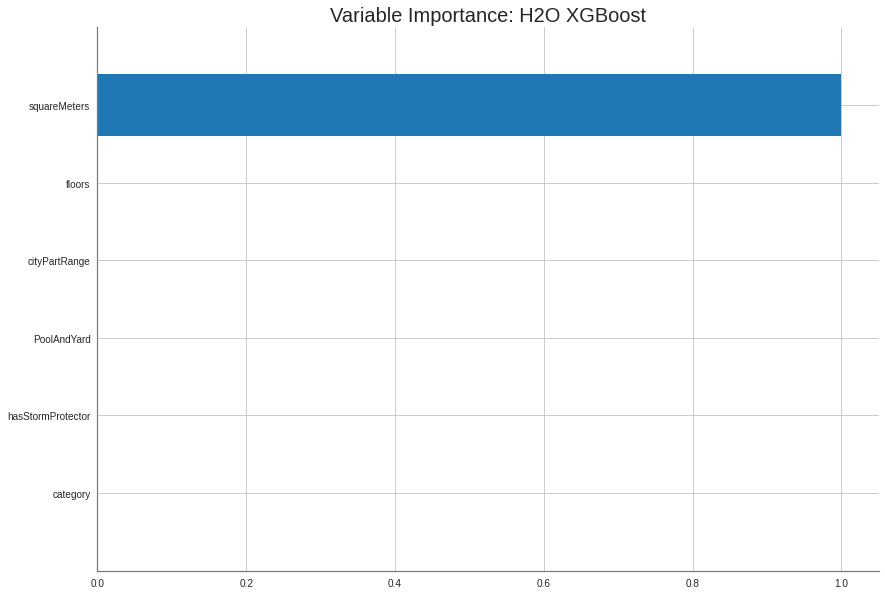

<Figure size 576x396 with 0 Axes>

In [ ]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

19
glm


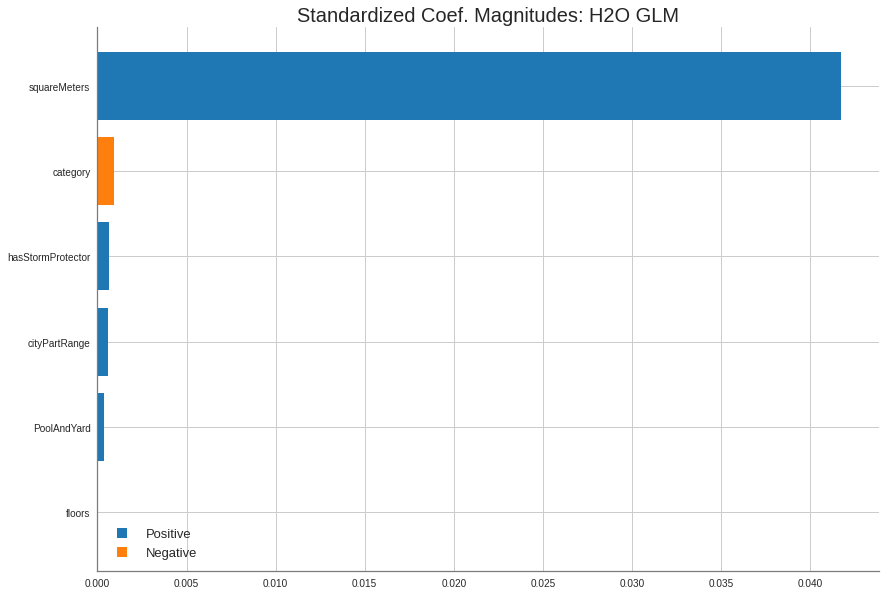

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

From the above results, we observe that squareMeters variable is a very important feature in the prediction.

# **Checking if assumptions violated**

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be between 1.5-2.5 for no autocorrelation.

In [ ]:
#Seperating the predictor and target variables
A=dfpd1.drop(['price'],axis=1)
B=dfpd1['price']

In [ ]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [ ]:
cols1 = ['squareMeters', 'floors', 'cityPartRange', 'hasStormProtector', 'category', 'PoolAndYard']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [ ]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.6151134332176298e-09


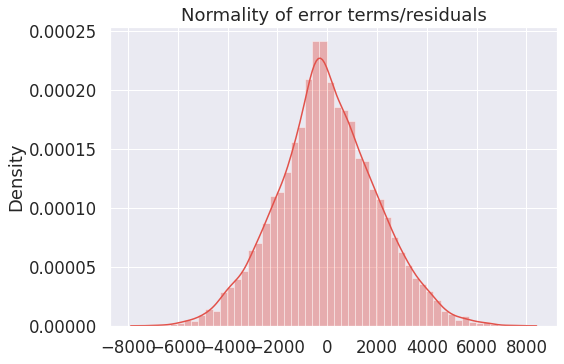

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

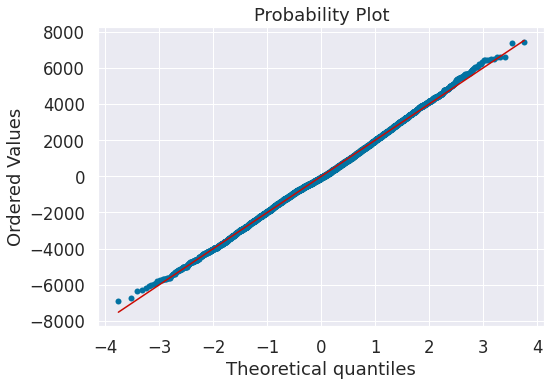

In [ ]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()
     

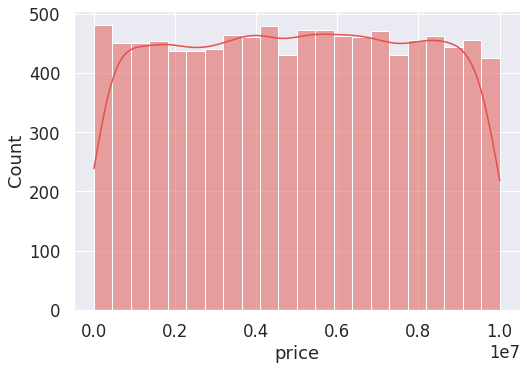

In [ ]:
sns.histplot(dfpd.price, kde = True)

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even these assumptions are satisfied.

# **Ridge Regularization**

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)
     

In [ ]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677396183771_41


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  6                             6                              1                       py_16_sid_b901

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 12364559.868116384
RMSE: 3516.327611033475
MAE: 2906.321429223069
RMSLE: 0.017116306216807584
Mean Residual Deviance: 12364559.868116384
R^2: 0.9999985152920338
Null degrees of freedom: 7989
Residual degrees of freedom: 7983
Null deviance: 6.6540246024853e+16
Residual deviance: 98792833346.24991
AIC: 153170.093218599

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ------------------
    2023-02-26 07:48:35  0.000 sec   0             6.654024616620279e+16      8327940696646.156
    2023-02-26 07:48:35  0.015 sec   1                                                           3516.327611033475  12364559.868116384   2906.321429223069  0.9999985152920338

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
squareMeters       2.88313e+06            1                    0.998658
PoolAndYard        1923.01                0.000666988          0.000666093
floors             1560.45                0.000541235          0.000540509
cityPartRange      170.027                5.8973e-05           5.88938e-05
category           123.188                4.27272e-05          4.26699e-05
hasStormProtector  98.3995                3.41294e-05          3.40836e-05

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677396183771_42


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              6                             6                              1                       py_16_sid_b901

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 4043259.3236123044
RMSE: 2010.7857478140988
MAE: 1573.1350931839083
RMSLE: 0.006270451735087562
Mean Residual Deviance: 4043259.3236123044
R^2: 0.9999995144947017
Null degrees of freedom: 7989
Residual degrees of freedom: 7983
Null deviance: 6.6540246024853e+16
Residual deviance: 32305641995.66231
AIC: 144239.00564732432

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2023-02-26 07:48:35  0.000 sec   0             6.654024616620279e+16      8327940696646.156
    2023-02-26 07:48:35  0.102 sec   1                                                           2010.7857478140988  4043259.3236123044   1573.1350931839083  0.9999995144947017

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
squareMeters       2.88602e+06            1                    0.998665
PoolAndYard        1920.01                0.000665281          0.000664393
floors             1564.92                0.000542242          0.000541518
category           189.23                 6.55679e-05          6.54803e-05
cityPartRange      130.834                4.53336e-05          4.52731e-05
hasStormProtector  53.1493                1.84161e-05          1.83916e-05

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# **Data Report**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_1_AutoML_2_20230226_74448,22261.5,4.95573e+08,16768,0.102545,4.95573e+08,496,0.001815,DeepLearning
StackedEnsemble_AllModels_2_AutoML_2_20230226_74448,24835.4,6.16797e+08,18628.7,0.0441023,6.16797e+08,1182,0.15557,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20230226_74448,24836.8,6.16868e+08,18630.1,0.0441158,6.16868e+08,1004,0.09888,StackedEnsemble
XGBoost_3_AutoML_2_20230226_74448,27971.4,7.82399e+08,20917.2,0.0396397,7.82399e+08,1179,0.005084,XGBoost
GBM_1_AutoML_2_20230226_74448,39144.8,1.53232e+09,30135.2,nan,1.53232e+09,6722,0.170573,GBM
StackedEnsemble_BestOfFamily_2_AutoML_2_20230226_74448,40847.3,1.6685e+09,31681.3,nan,1.6685e+09,1233,0.185257,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20230226_74448,40953.9,1.67722e+09,31765.6,nan,1.67722e+09,2759,0.352408,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230226_74448,41146.9,1.69307e+09,31929.2,nan,1.69307e+09,1598,0.203504,StackedEnsemble
GBM_3_AutoML_2_20230226_74448,68864.9,4.74238e+09,49577.1,nan,4.74238e+09,2627,0.066189,GBM
GBM_2_AutoML_2_20230226_74448,69938.7,4.89142e+09,49993.5,nan,4.89142e+09,3446,0.053054,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

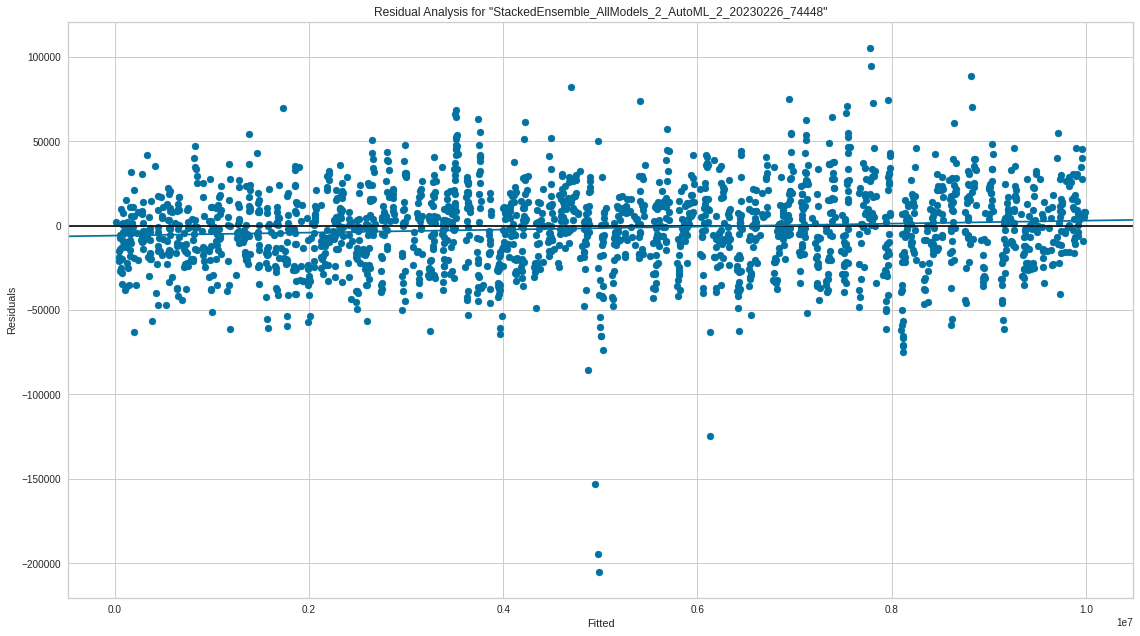

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

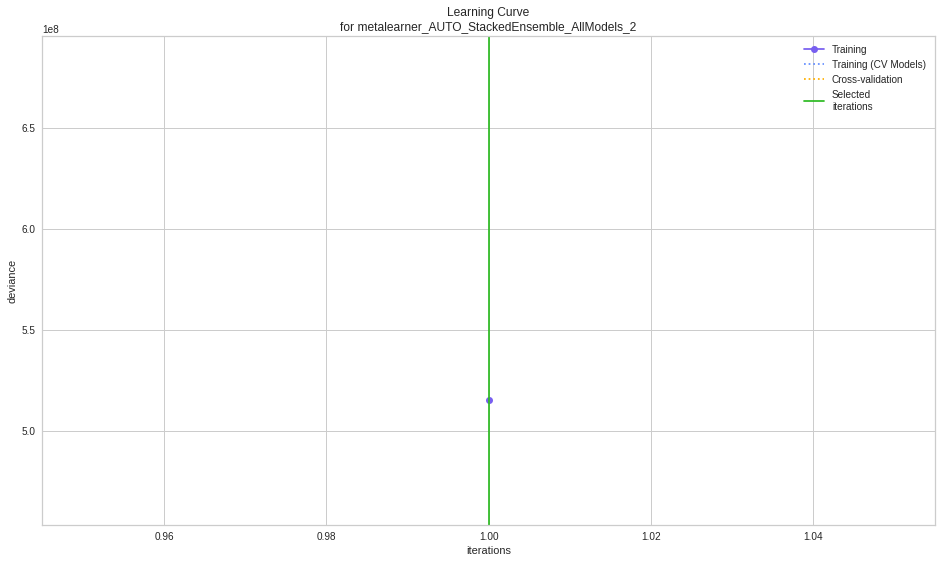

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

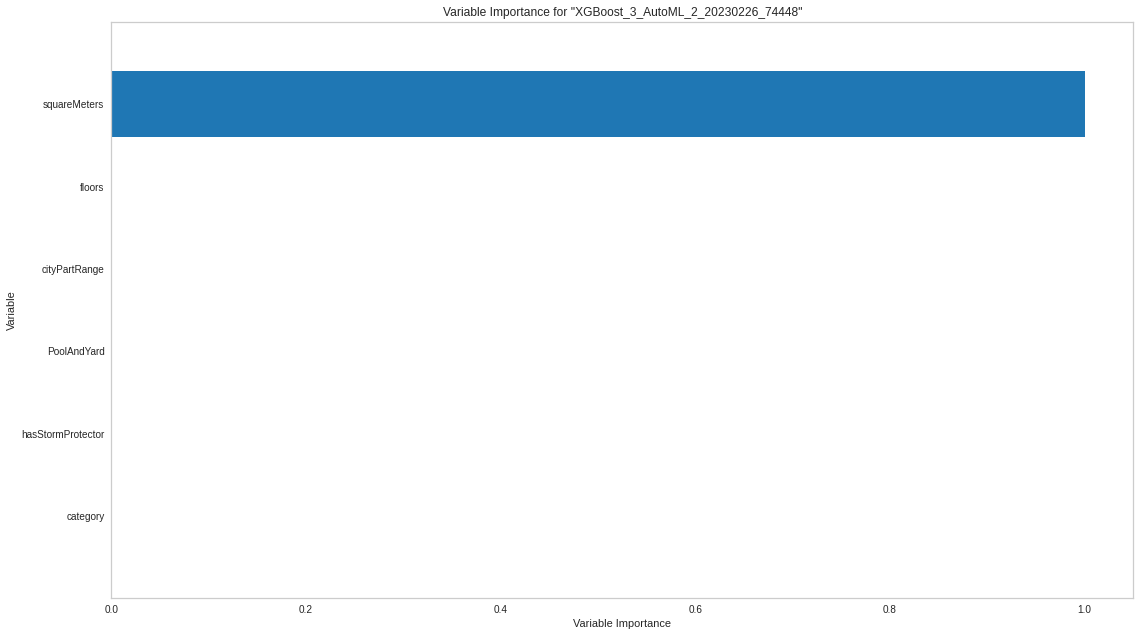

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

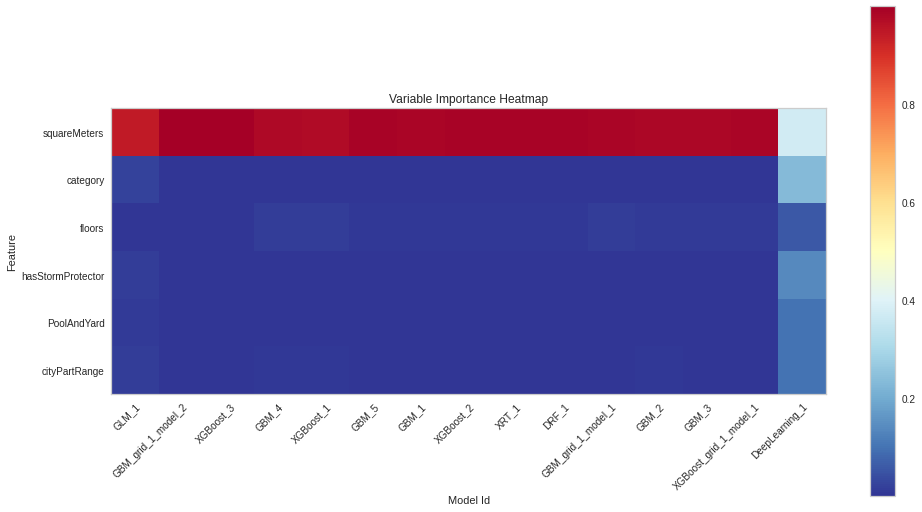

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

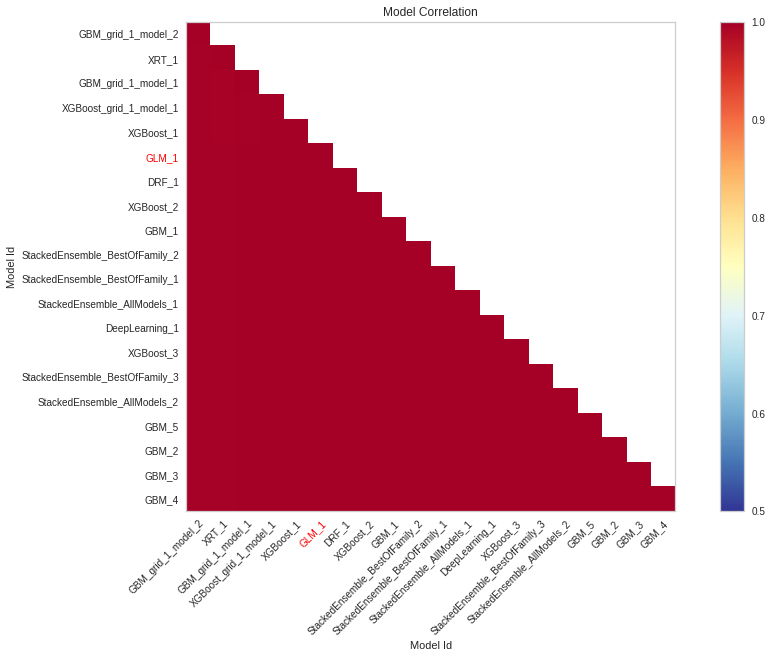

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

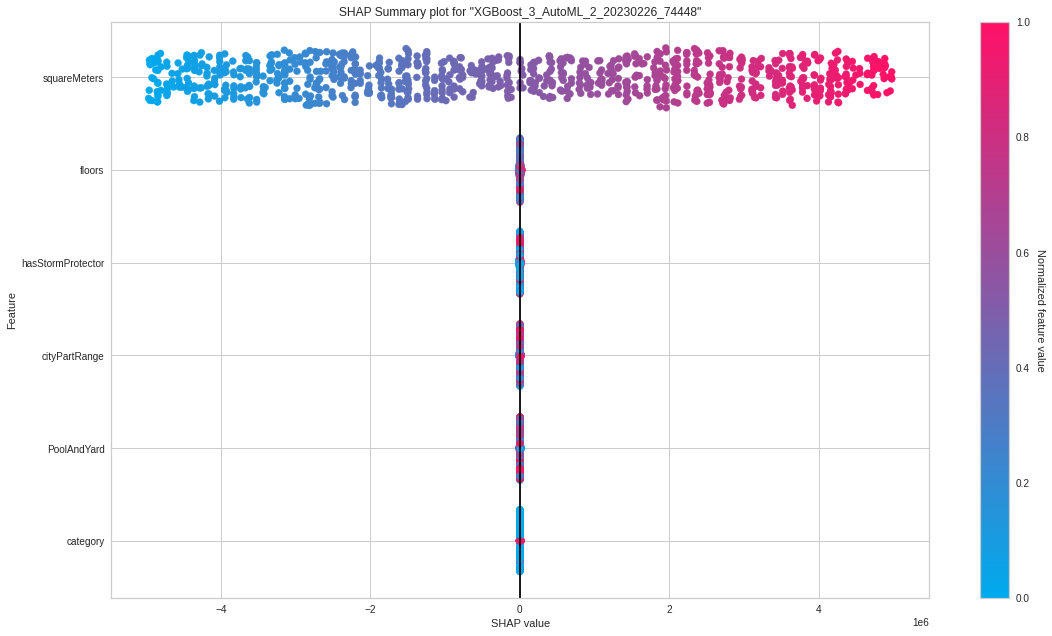

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

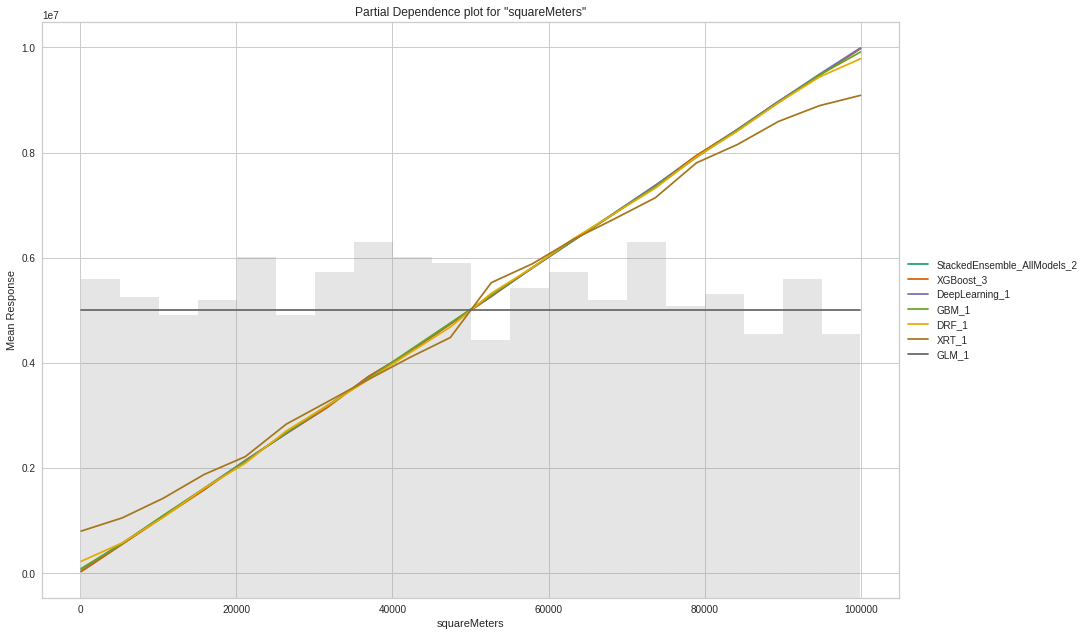

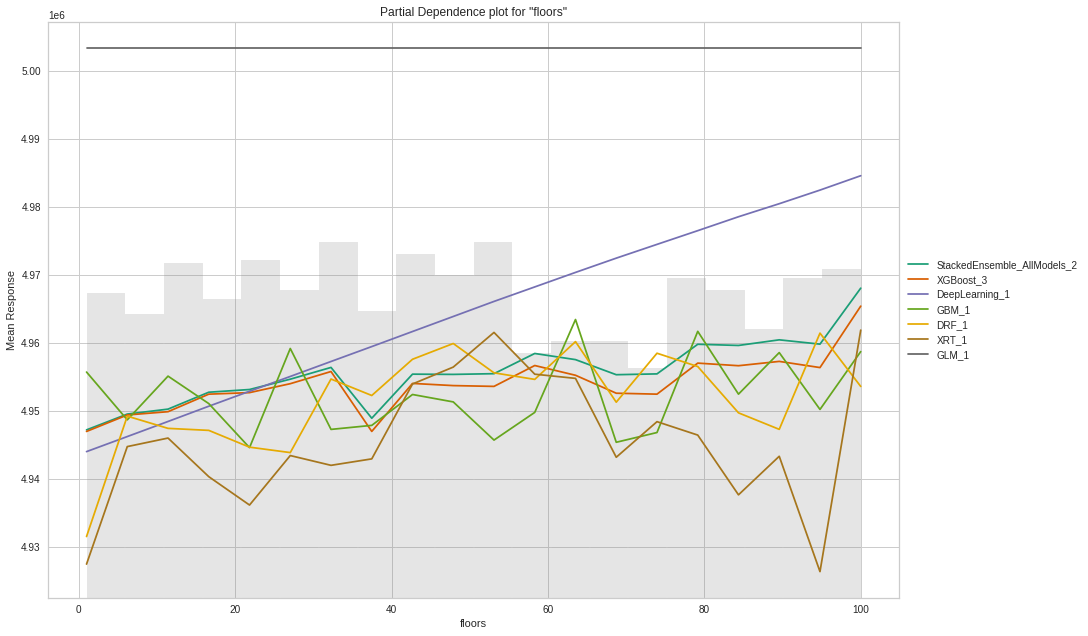

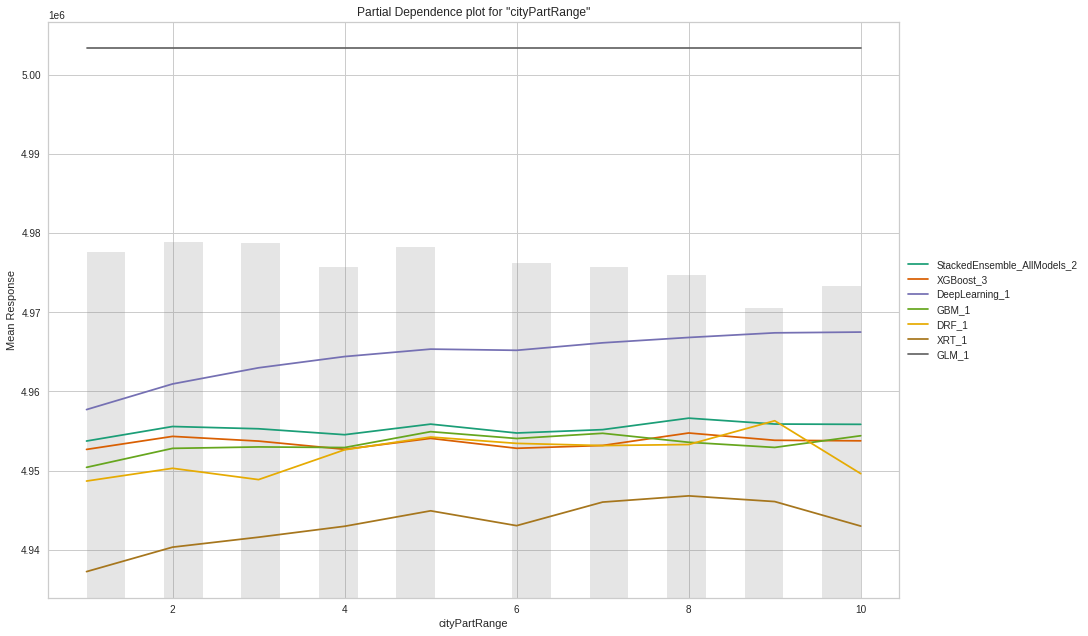

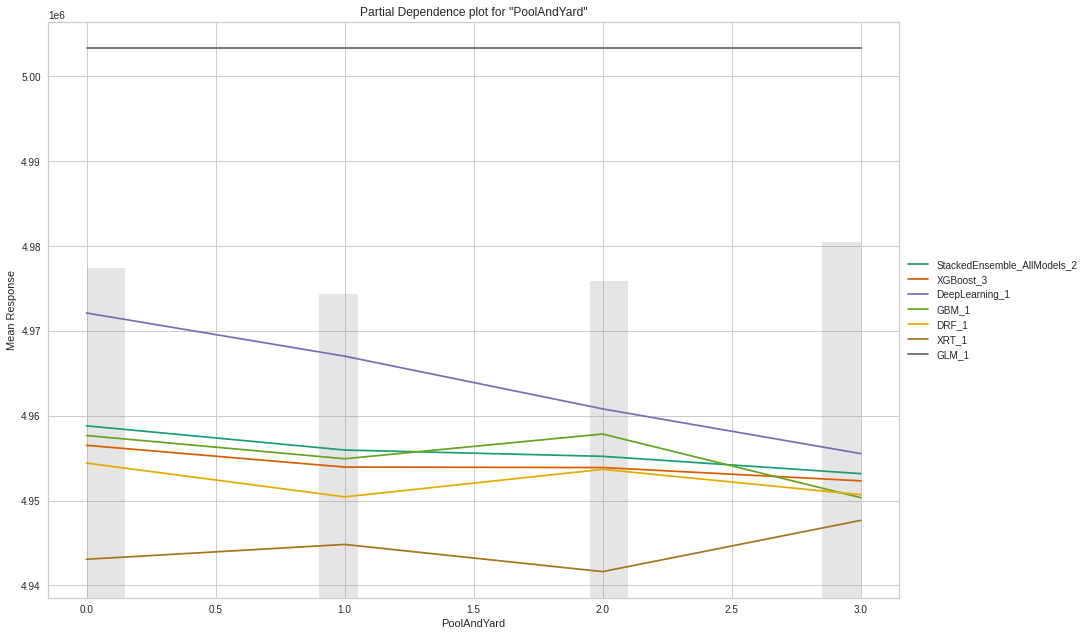

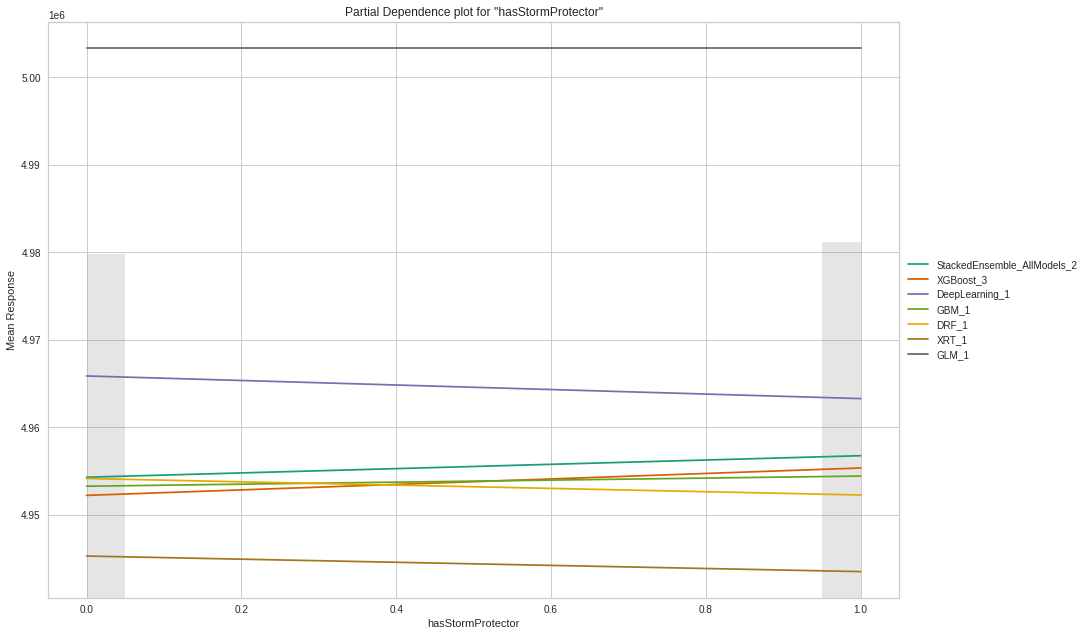

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

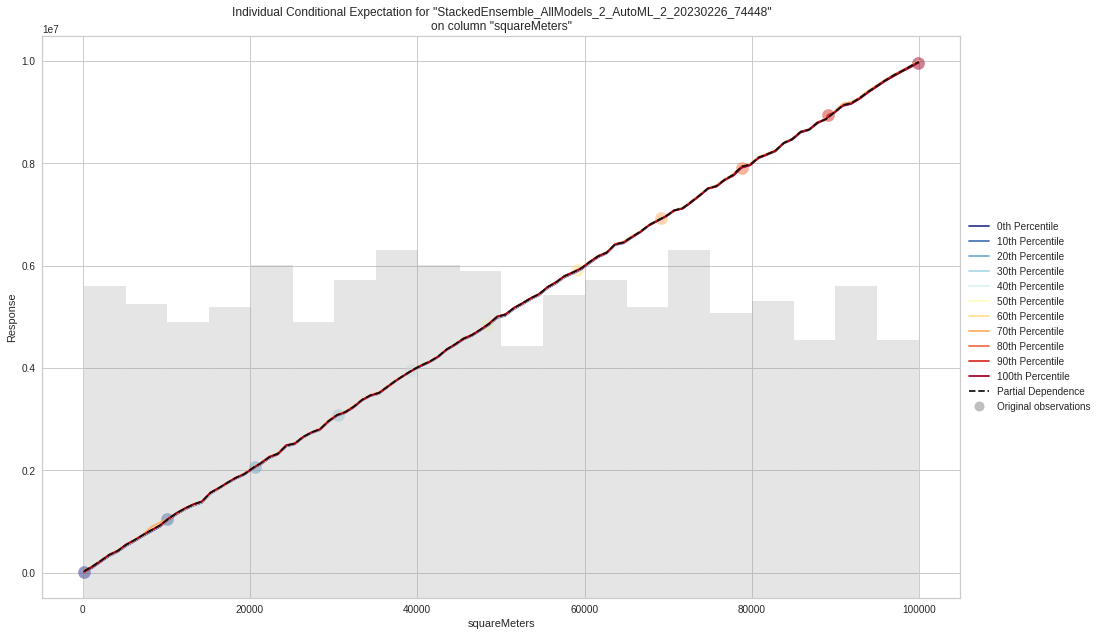

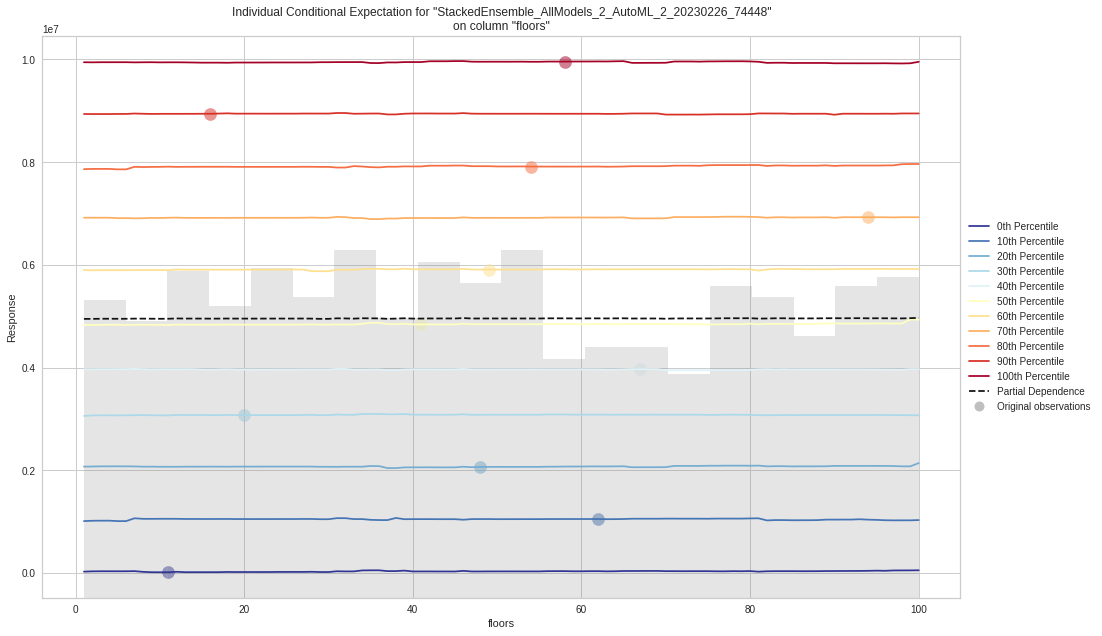

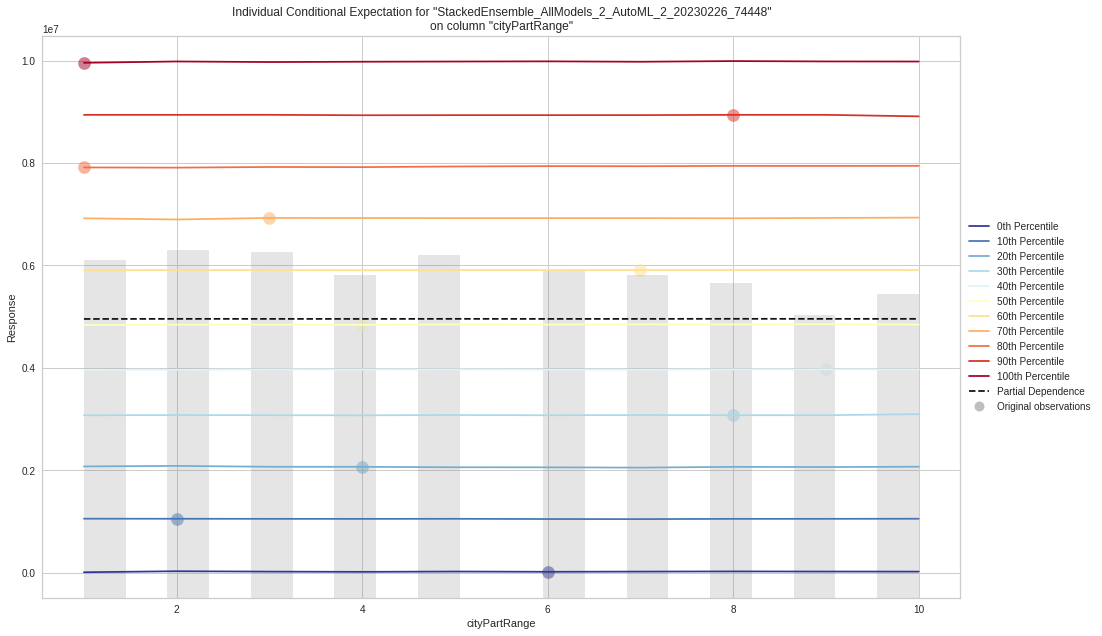

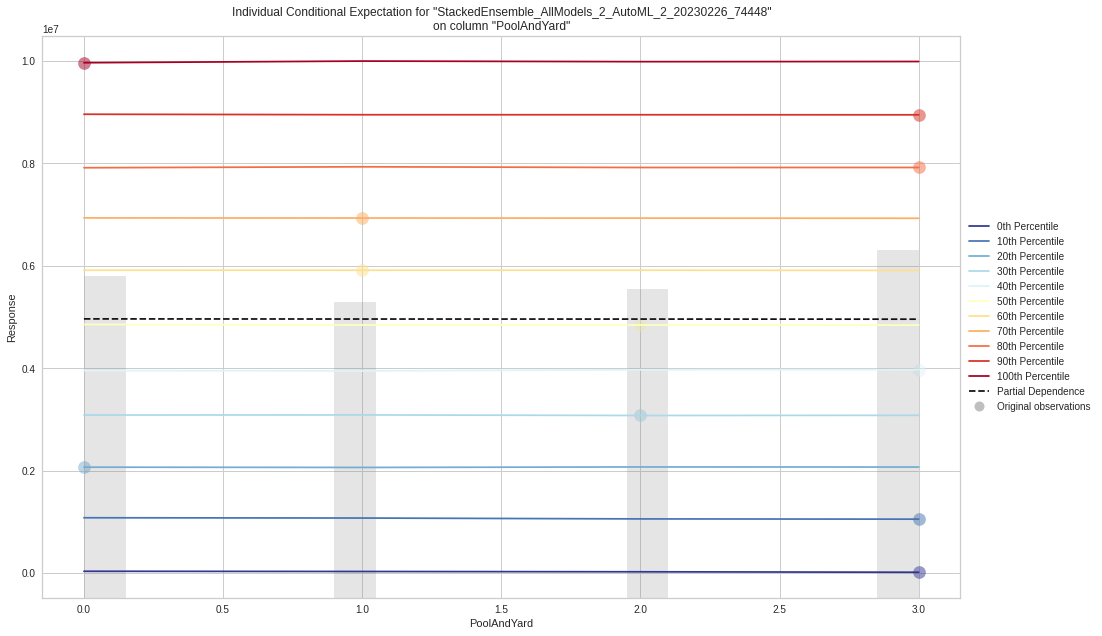

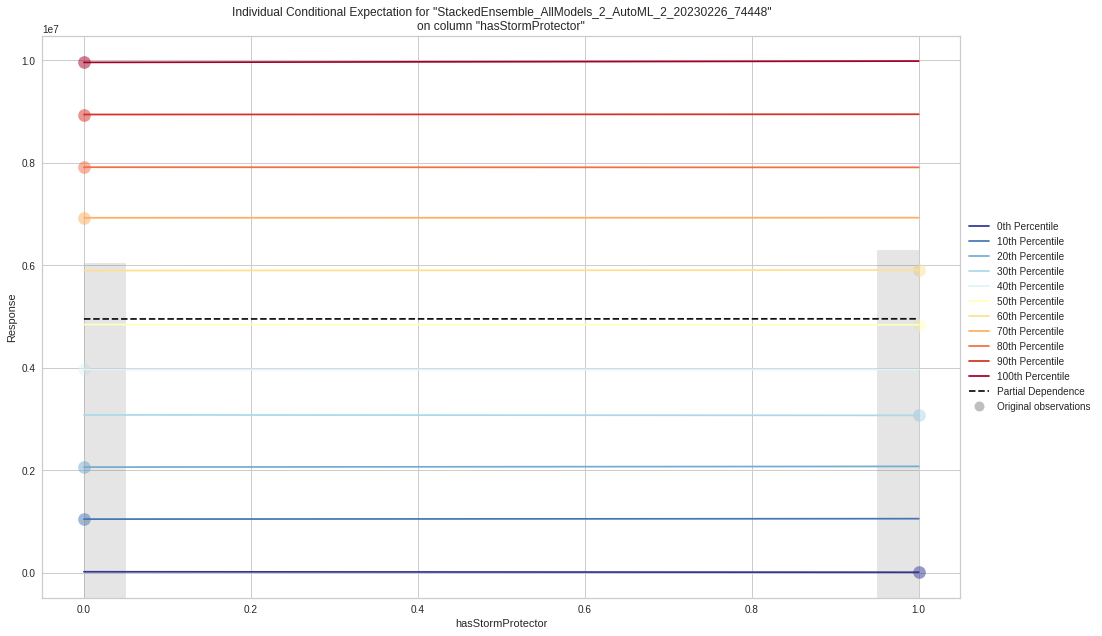

In [ ]:
exa = aml1.explain(df1_test)

# **Hyperparameter Tuning**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [ ]:
s = dfpd1['price']

t = dfpd1.drop(['price'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)
     

Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)


In [ ]:
random_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 1100}

# **Conclusion**

A fundamental algorithm based on the linear regression method to predict housing prices was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Paris Housing price. This gave the best model as ‘XGBoost’. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the housing price to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

# **Assignment Final Answers**

**1)Is the relationship significant?**

To identify whether the relationship is statiscally significant, we implements the OLS method. Based on the output of OLS, it shows that the p-values of the variable isNewBuilt, numberOfRooms, cityCode, numPrevOwners, Made, Basement, attic, garage, hasStorageRoom, and hasGuestRoom are all more than 0.05. P-value that is more than 0.05 is not signifant. Hence, the rest such as the squareMeters, floors, cityPartRange, hasStormProtector, category and PoolAndYard are having their p-value that is less than 0.05. Hence we concluded that the relationship of the chosen dataset is not significant. 

**2)Are any model assumptions violated?**

Linear relationship- The graph of dependent and independent variables align linearly across the graph. Hence, this assumption is not violated.

Homoscedasticity- The plot of residuals shows a bell curve, which means that the plot of residuals is normally distributed. This assumption is not violated. 

Multicollinearity- Based on the correlation matrix and the heatmap, it shows that the squareMeters and price are highly correlated with each other. This assumption is violated. 

**3)Is there any multicollinearity in the model?**

Yes. There is a correlation between squareMeters and price. 


**4)In the multivariate models are predictor variables independent of all the other predictor variables?**

Yes, based on the correlation matrix, all the predictor variables are not related with any other predictors. 

**5)In multivariate models rank the most significant predictor vairables and exclude insignificant ones from the model.**

From the variable importance plot, it shows that the squareMeters is the most signifianct predictor in the model. 


**6)Does the model make sense?**

No, because the RMSE, MSE and MAE should be as low as possible, however in the models we had built, the errors are all relatively high than what we have expected.  


**7)Does regularization help?**

No, because the errors in all of the model are very high.

**8) Which independent variables are significant?**

Variables are significant when p-value is less than 0.05. For this the isNewBuilt, numberOfRooms, cityCode, numPrevOwners, Made, Basement, attic, garage, hasStorageRoom, and hasGuestRoom have p-value more than 0.05. Other than these variables, all are significat. 

**8)Which hyperparameters are significant?**

 To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth': 1100, 'min_samples_split': 5 and 'n_estimators': 200




# **References**

H2O- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

DATASET- https://www.kaggle.com/datasets/aleshagavrilov/parishousing



MIT License
Copyright (c) 2022 Jay Sunil Pakale

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.